<a href="https://colab.research.google.com/github/dhamacher/tensorflow-models/blob/main/functional_api_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Keras Functional API](https://keras.io/guides/functional_api/)

# NN Regression with Functional API
## Purpose
Showcase the functional API from TensorFLow by building a regression model based on the california housing data set.

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
housing_data = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing_data.data, housing_data.target
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full
)

In [8]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_valid = scalar.transform(X_valid)
X_test = scalar.transform(X_test)

## Create the Layers

In [11]:
import tensorflow as tf

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
hidden1 = tf.keras.layers.Dense(30, activation='relu')(input_)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
concat = tf.keras.layers.Concatenate()([input_, hidden2])
output = tf.keras.layers.Dense(1)(concat)

model = tf.keras.Model(input=[input_], outputs=[output])

## Compile the Model

In [12]:
model.compile(loss='mean_squared_error', optimizer='sgd')

## Train the Model

In [13]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.8172 - val_loss: 0.5790
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4439 - val_loss: 0.5152
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4017 - val_loss: 0.7111
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3853 - val_loss: 0.3934
Epoch 5/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3747 - val_loss: 0.5756
Epoch 6/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3687 - val_loss: 0.4324
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3665 - val_loss: 0.5303
Epoch 8/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3614 - val_loss: 0.3813
Epoch 9/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3585 - val_loss: 0.3837
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3546 - val_loss: 0.6718

## Visualize

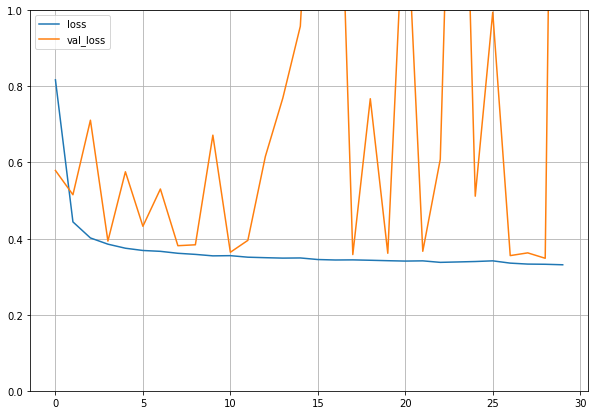

In [15]:
import pandas as pd
import matplotlib.pyplot as plt 

pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


## Evaluate the Model

In [16]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4467


## Make Predictions

In [19]:
X_new = X_test[:3]
y_hat = model.predict(X_new)
y_hat

array([[0.9059441 ],
       [0.66080743],
       [1.4518293 ]], dtype=float32)